In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Y_25_75.csv")

In [3]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]
print(label)

0       Corn
1       Corn
2       Corn
3       Corn
4       Corn
        ... 
2395     PAO
2396     PAO
2397     PAO
2398     PAO
2399     PAO
Name: Unnamed: 790, Length: 2400, dtype: object


In [4]:
pca = PCA(n_components=6)  
spectra_pca = pca.fit_transform(spectra)

print(spectra_pca)

[[ 0.06910437 -0.04852345 -0.46604735 -0.18477772 -0.11854268  0.05938951]
 [ 0.16570534  0.04002633 -0.11828512 -0.15273089 -0.11237836  0.03324223]
 [ 0.15988485  0.02749253 -0.13282304 -0.14375741 -0.12416879  0.03146253]
 ...
 [ 2.64516644  0.46949945 -0.66388438 -0.23681595  0.5090026   0.04532235]
 [ 2.30656812  0.53500136 -0.07675324  0.21103682  0.12916939 -0.01855647]
 [-0.72629228 -0.66071422  0.04384895 -0.11472191  0.30874544  0.13052614]]


In [5]:
pca_df = pd.DataFrame(data=spectra_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df['Label'] = label

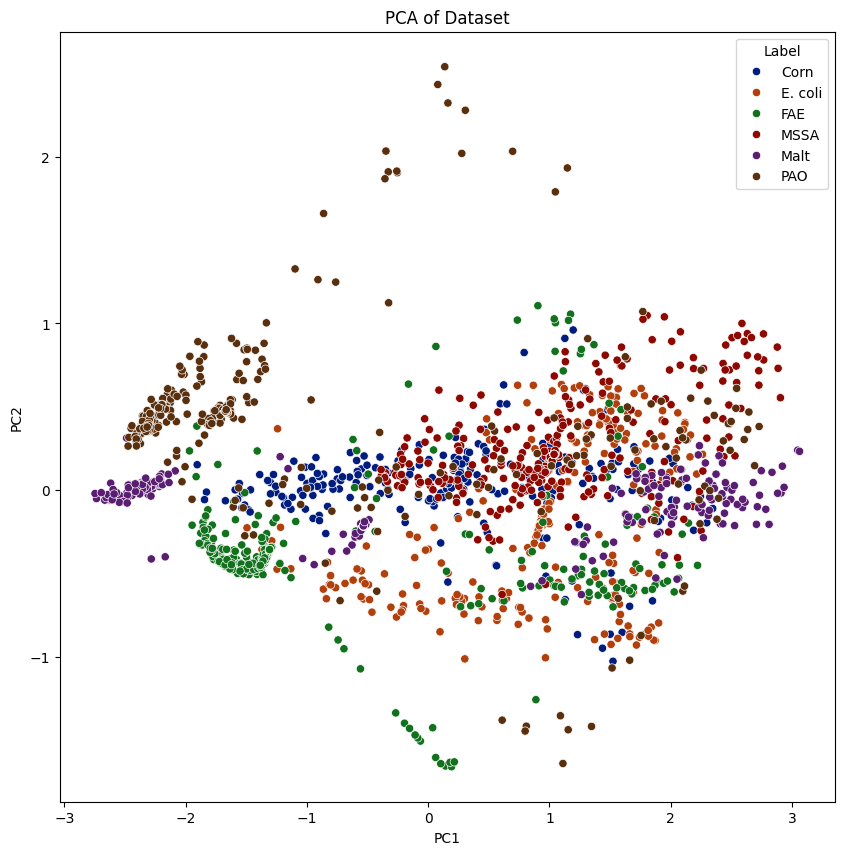

In [6]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='dark')
plt.title('PCA of Dataset')
plt.show()

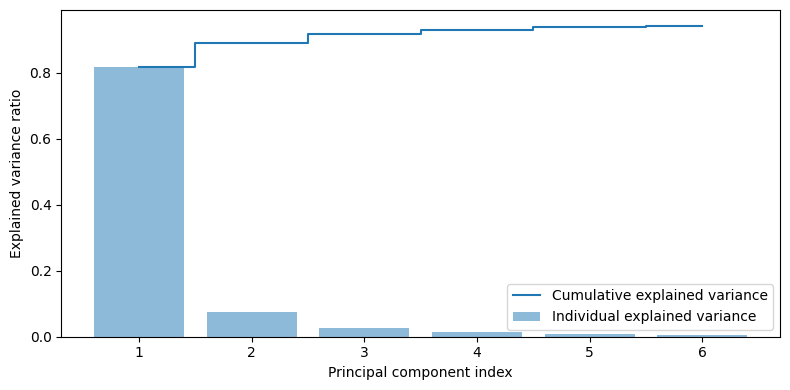

[0.81611321 0.07507051 0.02574819 0.01389534 0.00840167 0.00389543]


In [8]:
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(variance_ratio) + 1), variance_ratio.cumsum(), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print(variance_ratio)
